# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
Y

array([1.7  , 2.76 , 2.09 , 3.19 , 1.694, 1.573, 3.366, 2.596, 2.53 ,
       1.221, 2.827, 3.465, 1.65 , 2.904, 2.42 , 2.94 , 1.3  ])

In [9]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)
print(W,'\n',b)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=-0.7193773> 
 <tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.10061692>


In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.168067, W: 0.299422, b: 0.460013
step: 100, loss: 0.165001, W: 0.293953, b: 0.498782
step: 150, loss: 0.162596, W: 0.289111, b: 0.533115
step: 200, loss: 0.160711, W: 0.284822, b: 0.563519
step: 250, loss: 0.159232, W: 0.281024, b: 0.590444
step: 300, loss: 0.158072, W: 0.277661, b: 0.614288
step: 350, loss: 0.157163, W: 0.274683, b: 0.635403
step: 400, loss: 0.156450, W: 0.272045, b: 0.654101
step: 450, loss: 0.155890, W: 0.269710, b: 0.670660
step: 500, loss: 0.155452, W: 0.267641, b: 0.685324
step: 550, loss: 0.155108, W: 0.265809, b: 0.698310
step: 600, loss: 0.154838, W: 0.264187, b: 0.709810
step: 650, loss: 0.154627, W: 0.262751, b: 0.719994
step: 700, loss: 0.154461, W: 0.261479, b: 0.729012
step: 750, loss: 0.154331, W: 0.260352, b: 0.736998
step: 800, loss: 0.154228, W: 0.259355, b: 0.744071
step: 850, loss: 0.154148, W: 0.258471, b: 0.750334
step: 900, loss: 0.154086, W: 0.257689, b: 0.755880
step: 950, loss: 0.154037, W: 0.256996, b: 0.760792
step: 1000, l

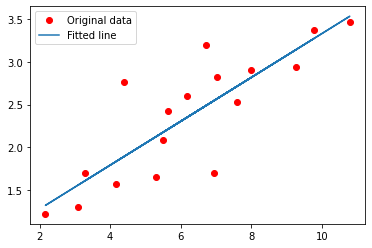

In [8]:
# Graphic display
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()